## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_total = len(merged_data.groupby('Mouse ID').count())
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data['Mouse ID'].value_counts()
#g989 has too many entries!!

g989    13
t198    10
n304    10
l471    10
c832    10
        ..
b447     1
t573     1
l872     1
u153     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.groupby('Mouse ID').get_group('g989').head(14)
#it can be seen that data for this Mouse ID has duplicate timepoints from 0-20 and they are
#reporting dicordant Tumor Volumes and Metastatic Sites for those duplicate Timepoints . 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged = merged_data.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])

#removed bad mouse data seen above

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_total= len(cleaned_merged['Mouse ID'].value_counts())
mice_total


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_list = []
mean_list = []
median_list = []
var_list = []
std_list = []
sem_list = []
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

for regimen in cleaned_merged.groupby('Drug Regimen'):
    regimen_list.append(regimen[0])
    mean_list.append(regimen[1]['Tumor Volume (mm3)'].mean())
    median_list.append(regimen[1]['Tumor Volume (mm3)'].median())
    var_list.append(regimen[1]['Tumor Volume (mm3)'].var())
    std_list.append(regimen[1]['Tumor Volume (mm3)'].std())
    sem_list.append(st.sem(regimen[1]['Tumor Volume (mm3)']))

summary_df = pd.DataFrame({
    'Drug Regimen':regimen_list,
    'mean':mean_list, 
    'median':median_list,
    'var':var_list,
    'std':std_list,
    'sem':sem_list
})

summary_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'total mice')

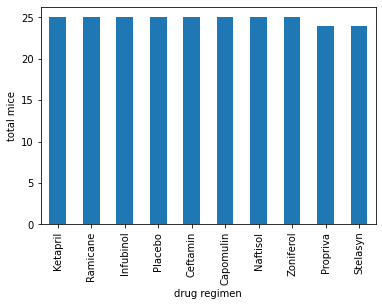

In [49]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

bar_df = cleaned_merged.drop_duplicates(subset='Mouse ID', keep="last")['Drug Regimen'].value_counts()
#duplicate mice were dropped, and then the drug regimen column had the remaining unique mice counted up
bar_chart = bar_df.plot(kind='bar')
plt.xlabel('drug regimen')
plt.ylabel('total mice')



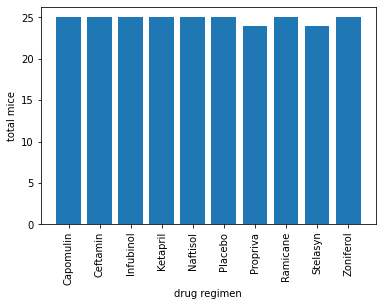

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per_regimen = []

for regimen in cleaned_merged.drop_duplicates(subset='Mouse ID', keep="last").groupby("Drug Regimen"):
    mice_per_regimen.append(len(regimen[1]))

plt.bar(regimen_list, mice_per_regimen)
plt.xticks(rotation = 'vertical')
plt.xlabel('drug regimen')
plt.ylabel('total mice')
plt.show()

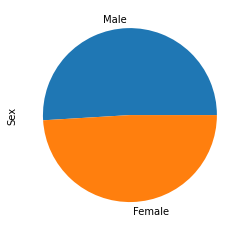

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df = cleaned_merged['Sex'].value_counts()

pie_chart = pie_df.plot(kind="pie")

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [Capomulin, Ramicane, Infubinol, Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'tumor volume (mm3)')

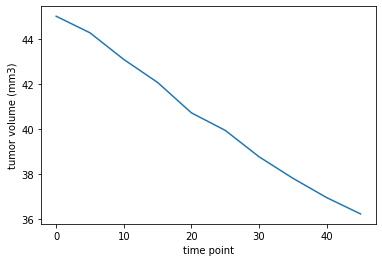

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(0, 46, 5)
tumor_volume = cleaned_merged.groupby("Drug Regimen").get_group('Capomulin').groupby("Timepoint")["Tumor Volume (mm3)"].mean()

plt.plot(x_axis, tumor_volume)
plt.xlabel('time point')
plt.ylabel('tumor volume (mm3)')



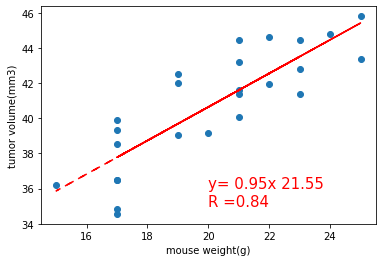

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = cleaned_merged.groupby("Drug Regimen").get_group('Capomulin').groupby("Mouse ID")["Weight (g)"].mean()
tumor_volume = cleaned_merged.groupby("Drug Regimen").get_group('Capomulin').groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, tumor_volume)
equation = "y= " + str(round(slope,2)) + "x " + str(round(intercept, 2))

trend_line = slope * mouse_weight + intercept
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, trend_line, 'r-', dashes = [5,5])

plt.annotate(equation, (20,36), fontsize = 15, color = 'red')
plt.annotate(f"R ={r_value:.2f}", (20,35), fontsize = 15, color = 'red')

plt.xlabel('mouse weight(g)')
plt.ylabel('tumor volume(mm3)')
plt.show()




## Correlation and Regression

In [18]:
#see above scatterplot
